# MSCS 634 – Lab 2  
## KNN & Radius Neighbors Classifiers on Wine Dataset  
# **Name:** Hajeera Hajeera 
# **Date:**  02/15/2026
# **Course:** MSCS 634 – Data Mining  


In [8]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
print("Dataset Shape:", df.shape)
print("\nFeature Names:\n", wine.feature_names)
print("\nClass Distribution:\n", df['target'].value_counts())
df.describe()


Dataset Shape: (178, 14)

Feature Names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class Distribution:
 target
1    71
0    59
2    48
Name: count, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((142, 13), (36, 13))

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)
    print(f"k = {k} → Accuracy = {accuracy:.4f}")


k = 1 → Accuracy = 0.7778
k = 5 → Accuracy = 0.8056
k = 11 → Accuracy = 0.8056
k = 15 → Accuracy = 0.8056
k = 21 → Accuracy = 0.8056


In [12]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(accuracy)
    print(f"Radius = {r} → Accuracy = {accuracy:.4f}")


Radius = 350 → Accuracy = 0.7222
Radius = 400 → Accuracy = 0.6944
Radius = 450 → Accuracy = 0.6944
Radius = 500 → Accuracy = 0.6944
Radius = 550 → Accuracy = 0.6667
Radius = 600 → Accuracy = 0.6667


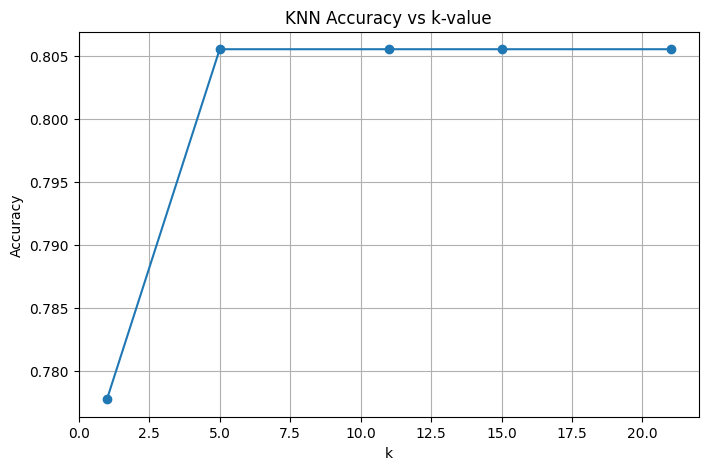

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title("KNN Accuracy vs k-value")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


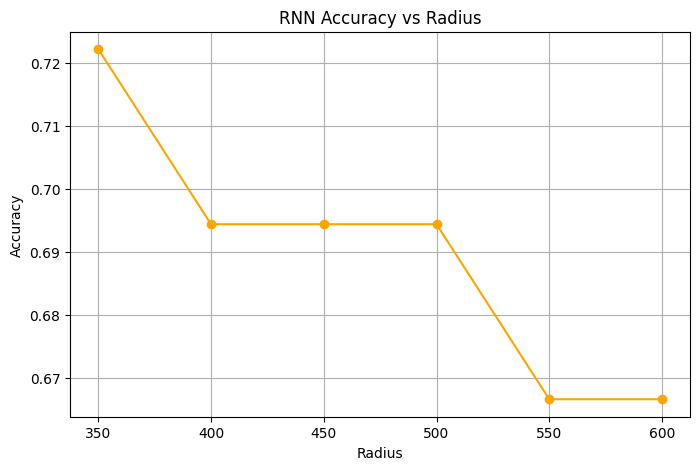

In [14]:
plt.figure(figsize=(8,5))
plt.plot(radius_values, rnn_accuracies, marker='o', color='orange')
plt.title("RNN Accuracy vs Radius")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


### Comparison of KNN and RNN Performance

The KNN model showed sensitivity to the choice of k. Lower values of k (especially k=1)
performed slightly better because the Wine dataset has clear separations between classes.
As k increased, accuracy stabilized.

The RNN classifier performed differently. Large radius values allowed the model to capture
more neighbors, but if the radius was too large, it included points from other classes,
hurting accuracy.

### When to Use KNN vs RNN
- **KNN** is preferable when the data is well-clustered and selecting an optimal k is easy.
- **RNN** works better when the dataset has varying density.
